In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyemma.plots as mplt

In [11]:
loaded_CG_projection = np.load('')

In [12]:
number_bins = 60

histo, xedges, yedges = np.histogram2d(loaded_CG_projection[:,0], 
                                       loaded_CG_projection[:,1], 
                                       bins=number_bins)

indices_of_uniformly_distributed_starting_structures = []

index_pool = []

for x in range(number_bins):
    for y in range(number_bins):
        index_pool.append((x,y))

while len(indices_of_uniformly_distributed_starting_structures)<50:
    
    random_bin_index = np.random.choice([x for x in range(len(index_pool))])
    x_bin_number = index_pool[random_bin_index][0]
    y_bin_number = index_pool[random_bin_index][1]
        
    population = histo[x_bin_number, y_bin_number]
    index_pool.pop(random_bin_index)
    

    if population>=np.max(histo)**0.2: ### Use this to exclude really shallowly polulated areas
        x_range = [xedges[x_bin_number], xedges[x_bin_number+1]]
        y_range = [yedges[y_bin_number], yedges[y_bin_number+1]]
        
        lst_candidates = []
        for index_data_point_projection,data_point_projection in enumerate(loaded_CG_projection):
            if data_point_projection[0]>x_range[0]:
                if data_point_projection[0]<x_range[1]:
                    if data_point_projection[1]>y_range[0]:
                        if data_point_projection[1]<y_range[1]:
                            lst_candidates.append(index_data_point_projection)
                            
        chosen_candidate = lst_candidates[np.random.randint(0,len(lst_candidates))]
        
        indices_of_uniformly_distributed_starting_structures.append(chosen_candidate)

In [13]:
lst_BM_projections = []

for index in indices_of_uniformly_distributed_starting_structures:
    lst_BM_projections.append(loaded_CG_projection[index])

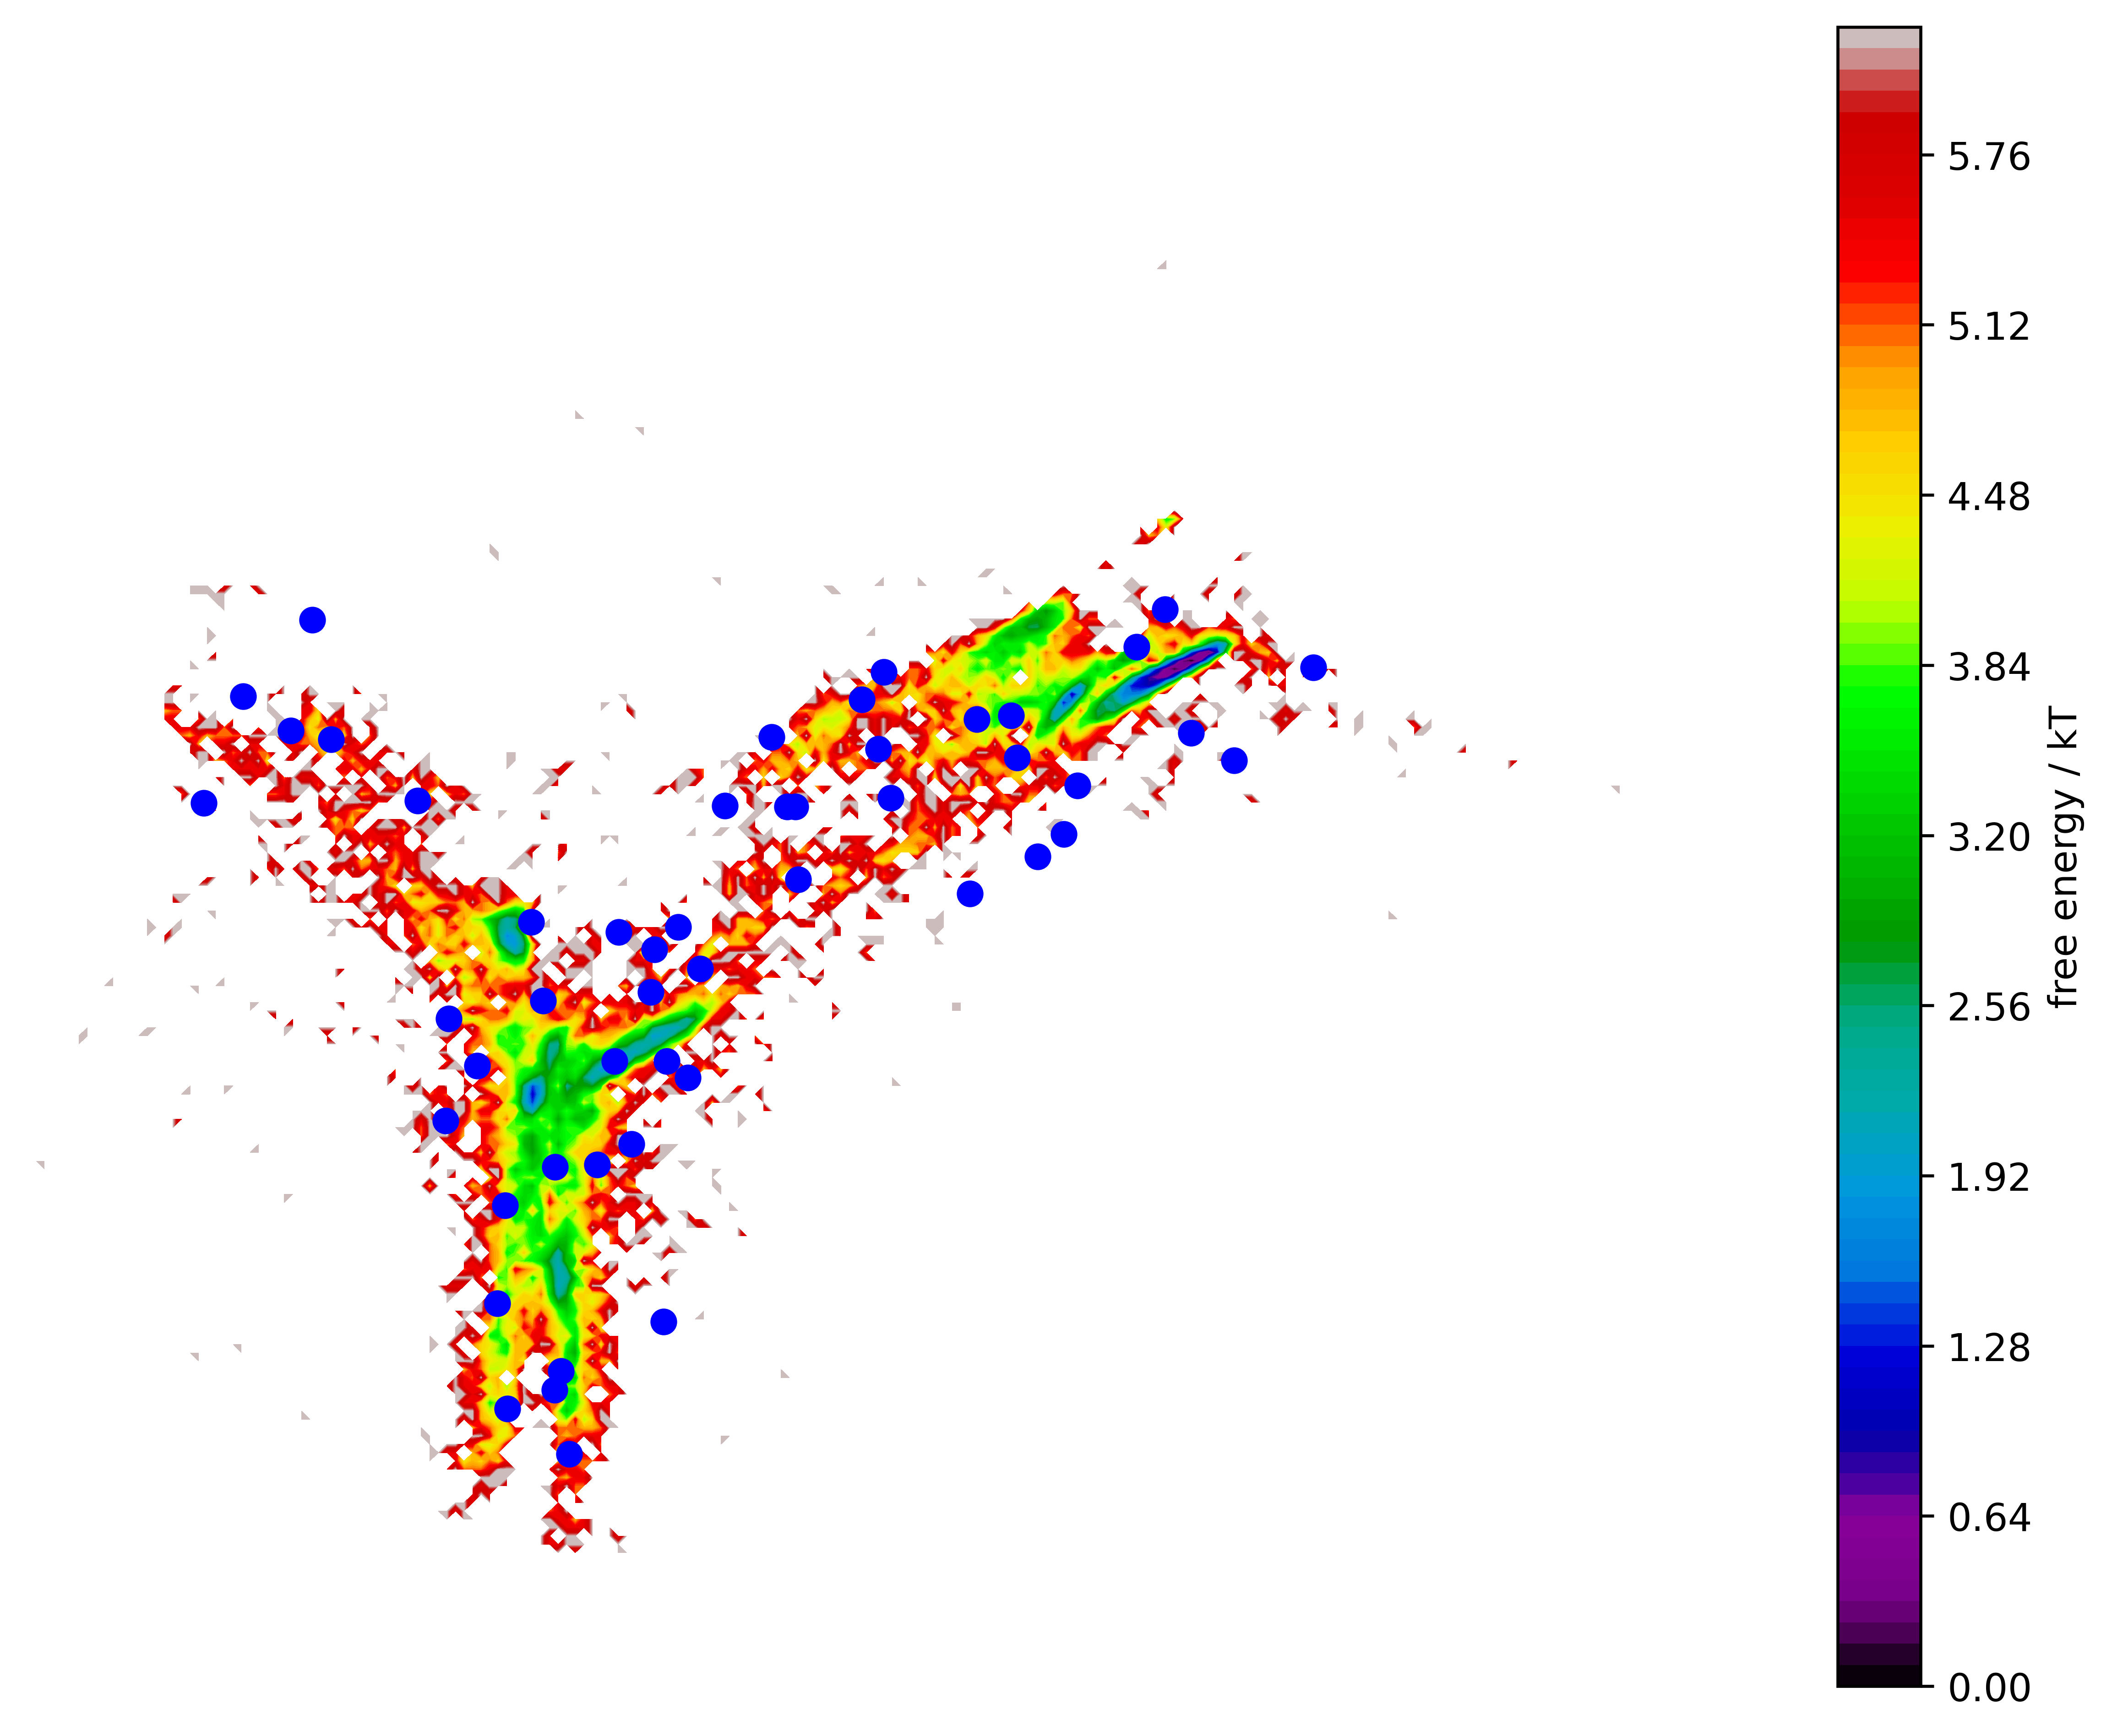

In [14]:
fig = plt.figure(figsize=(10, 8), dpi=600)

ax = fig.add_subplot(1, 1, 1)

ax.set_facecolor("white")

ax.axis('off')

mplt.plot_free_energy(loaded_CG_projection[:,0],
                      loaded_CG_projection[:,1], ax=ax, 
                      cmap='nipy_spectral', ncontours=100, nbins=200)

for BM_projection in lst_BM_projections:
    plt.scatter(float(BM_projection[0]), float(BM_projection[1]), c='blue')

plt.show()

## Use libraray of choice to extract the chosen CG conformations (e.g. mdanalysis or mdtraj) and apply back-mapping routine (e.g. backwards.py for MARTINI)